<h1 style="color:rgb(0,120,170)">Assignment 3: PCA and Kernel PCA</h1>

<h2 style="color:rgb(0,120,170)">Task 1: Theoretical aspects concerning PCA</h2>

Our aim is to discuss a certain aspect of the mathematical derivation of PCA, that has not been adressed in full detail in the lectures. We use the same notation as in the lecture, i.e. we are given a data matrix $\mathbf{X}= ( \mathbf{x}_1,...,\mathbf{x}_n )^\top$, where each $\mathbf{x}_i \in \mathbb{R}^m$ for $1\le i \le n$. 

A main reason, why PCA works very well, is the fact that the covariance matrix, defined as $\mathbf{C}=\frac 1n \mathbf{X}^T\mathbf{X}$, or equivalently, $c_{st}=\frac1n \sum_{i=1}^n x_{is} x_{it}$, is positive semi-definite. 
* Show this fact by proving $\left\langle\mathbf{C}\mathbf{a},\mathbf{a}  \right\rangle= \sum_{s,t=1}^m a_s a_t c_{st} \geq 0$ for any $\mathbf{a} \in \mathbb{R}^m$. 
* Moreover, show that positive semi-definiteness of $\mathbf{C}$ implies that all eigenvalues are non-negative. 
* Why is this an important fact in PCA? 

Sol:


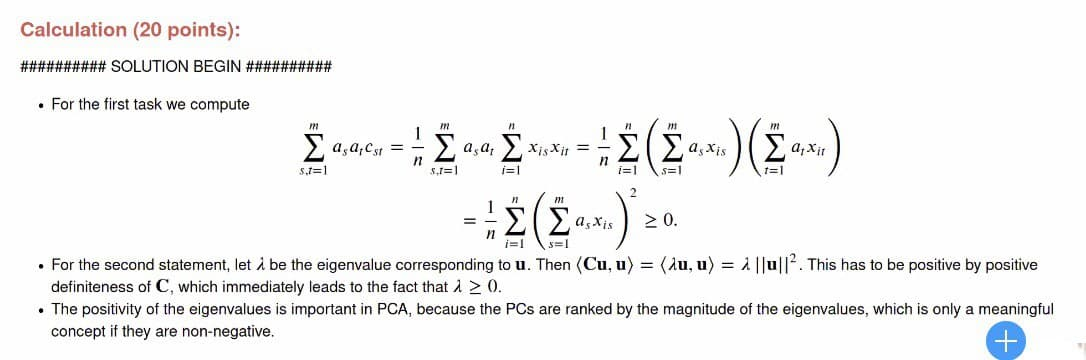

In [1]:
from IPython.display import Image
print('Sol:')
Image("pic1_as3.jpg")

<h3 style="color:rgb(210,90,80)">Calculation (20 points):</h3>

########## YOUR SOLUTION HERE ##########

* Show this fact by proving $\left\langle\mathbf{C}\mathbf{a},\mathbf{a}  \right\rangle= \sum_{s,t=1}^m a_s a_t c_{st} \geq 0$ for any $\mathbf{a} \in \mathbb{R}^m$. <br>
Start with one entry of C: $c_{st} = \frac{1}{n} \sum_{i=1}^n x_{is}\cdot x_{it}$<br>
It follows: $\left\langle\mathbf{C}\mathbf{a},\mathbf{a}  \right\rangle= \sum_{s,t=1}^m a_s a_t c_{st} = \frac{1}{n} \sum_{s,t=1}^m\left(\sum_{i=1}^n x_{is}\cdot x_{it}\right)\cdot a_s \cdot a_t$<br>
$a_s, a_t$ are both numbers<br>
Let's check $c_{st} = c_{ts}$?: $c_{st} = \sum_{i=1}^n x_{is} x_{it}$ and $c_{ts} = \sum_{i=1}^n x_{it} x_{is}$ --> Yes, they are equal. Therefore: $c_{st} a_s a_t + c_{ts} a_s a_t >= 0$<br>
For remaining case: $c_{ss} = \frac{1}{n} \sum_{i=1}^n x_{is}x_{is} = \frac{1}{n} \sum_{i=1}^n x_{is}^2 >= 0$<br>
It follows: $\left\langle\mathbf{C}\mathbf{a},\mathbf{a}  \right\rangle= \sum_{s,t=1}^m a_s a_t c_{st} \geq 0$ for any $\mathbf{a} \in \mathbb{R}^m$. <br>

* Moreover, show that positive semi-definiteness of $\mathbf{C}$ implies that all eigenvalues are non-negative.<br>
$u^TCu = u^T \lambda u = \lambda u^T u = \lambda$<br>
We know that C positive semi-definite: $u^TCu >= 0$<br>
It follows: $u^TCu = \lambda >= 0$


* Why is this an important fact in PCA? <br>
Eigenvalues give us the amount of variances in each direction: a negative magnitude would make no sense, each variance needs to be >= 0

<h2 style="color:rgb(0,120,170)">Task 2: PCA applied to real world data set</h2>

We use the provided data set faces94.csv which is essentially based
on the pictures from the collection of Facial Images 1. This data set consists of $45 \times 50$
gray scale pixel images.
Let us first read in the data and plot the first image as an example.
This exercise should give you a feeling of what it really means to preserve variance.

In [1]:
#read data. Nothing to do here
import numpy as np
from sklearn.decomposition import PCA, KernelPCA
import matplotlib.pyplot as plt
from matplotlib import cm
# import data from csv file,
data = np.genfromtxt('faces94.csv', delimiter=',')

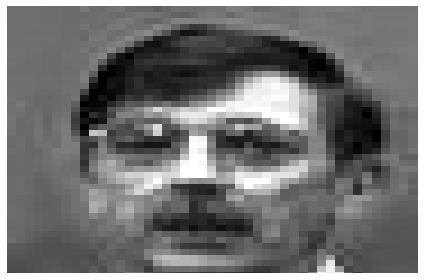

In [2]:
#plot first image as an example. Nothing to do here
def plotImg(x):
    fig, ax = plt.subplots()
    ax.pcolor(x.reshape(45, 50).T, cmap=cm.gray)
    ax.set_ylim([45, 0])
    ax.axis("off")
    fig.tight_layout()
# plot first img
plotImg(data[0, :])

<h3 style="color:rgb(0,120,170)">Task:</h3>

* We next use PCA for data-compression. Downproject the data using enough PCs to
explain $50 \% $, $75 \% $ and $99 \% $ of the variance. To do this use the sklearn-package. Print the number of principal components needed and also the explained variance for each of the tasks. 

<h3 style="color:rgb(210,90,80)">Code (10 points):</h3>

In [3]:
for aimed_vari in [0.5, 0.75, 0.99]:
    if aimed_vari == 0.99:
            number_comp =  369
            pca99 = PCA(n_components = number_comp)
            pca99.fit(data)
            explained_vari = sum(pca99.explained_variance_ratio_)
            
    elif aimed_vari == 0.75:
            number_comp = 18
            pca75 = PCA(n_components=number_comp)
            pca75.fit(data)
            explained_vari = sum(pca75.explained_variance_ratio_)

    else: 
            number_comp = 4
            pca50 = PCA(n_components = number_comp)
            pca50.fit(data)
            explained_vari = sum(pca50.explained_variance_ratio_)
    
    """
    # To find number components:
    if aimed_vari == 0.99:
        number_comp = data.shape[1]-1890
    elif aimed_vari == 0.75:
        number_comp = 10
    else: 
        number_comp = 1
    explained_vari = 0
    
    
    while explained_vari < aimed_vari:
        if aimed_vari == 0.99:
            pca99 = PCA(n_components = number_comp)
            pca99.fit(data)
            explained_vari = sum(pca99.explained_variance_ratio_)

        elif aimed_vari == 0.75:
            pca75 = PCA(n_components = number_comp)
            pca75.fit(data)
            explained_vari = sum(pca75.explained_variance_ratio_)

        else: 
            pca50 = PCA(n_components = number_comp)
            pca50.fit(data)
            explained_vari = sum(pca50.explained_variance_ratio_)
            
        number_comp += 1
    """
    print(f'Explained_variance: {explained_vari}; Number of Principal Components needed: {number_comp}')


Explained_variance: 0.5141740887465744; Number of Principal Components needed: 4
Explained_variance: 0.7562159543750724; Number of Principal Components needed: 18
Explained_variance: 0.9900314907566174; Number of Principal Components needed: 369


In [ ]:
# Solution:
pca99_sol = PCA(n_components = 0.99, svd_solver='full')
reduced_99 = pca99_sol.fit(data).transform(data)

<h3 style="color:rgb(0,120,170)">Task:</h3>

* You have essentially compressed vectors of dimension $d = 2250$ into vectors of much smaller dimension. Implement a function, that decompresses the data again, i.e. reconstruct the $2250$ dimensional data points, given the lower-dimensional representation. Print the dimension of the back-transformed data and the back-transformed data itself to check, if your result is indeed correct. 

<h3 style="color:rgb(210,90,80)">Code (10 points):</h3>

In [4]:
########## YOUR SOLUTION HERE ##########
print('Original data:\n',data)

def decompresser(Y, pca):
    X_back = Y @ pca.components_ + pca.mean_ # or pca.inverse_transform(Y)
    print(f'''\ndimension back transformed data: {X_back.shape[0]} * {X_back.shape[1]}
Back transformed data: \n{X_back}\n''')
    return X_back
    
Y = pca99.fit_transform(data)
X_back = decompresser(Y, pca99)
# Sol:
# np.all(np.isclose(X_back, pca.inverse_transform(Y)))

Original data:
 [[0.43137255 0.43137255 0.43137255 ... 0.35294118 0.3372549  0.34117647]
 [0.16078431 0.16470588 0.16862745 ... 0.04705882 0.61960784 0.8       ]
 [0.45882353 0.46666667 0.47843137 ... 0.36078431 0.34117647 0.34117647]
 ...
 [0.35294118 0.35686275 0.36862745 ... 0.39215686 0.40392157 0.40784314]
 [0.25882353 0.25882353 0.25098039 ... 0.18039216 0.22352941 0.24705882]
 [0.4627451  0.46666667 0.47058824 ... 0.42745098 0.51372549 0.46666667]]

dimension back transformed data: 3059 * 2250
Back transformed data: 
[[0.43672198 0.43508839 0.43507612 ... 0.36610354 0.33998168 0.34161124]
 [0.1436652  0.14452098 0.15475743 ... 0.07173769 0.6148944  0.82714777]
 [0.47288343 0.47275258 0.47788039 ... 0.36435552 0.34714894 0.36155414]
 ...
 [0.3580735  0.36420186 0.37542456 ... 0.38834307 0.41305006 0.37732459]
 [0.25793308 0.26137197 0.25759313 ... 0.15149719 0.2199375  0.26242764]
 [0.47420065 0.47661668 0.47848563 ... 0.44124174 0.50937132 0.44922215]]



<h3 style="color:rgb(0,120,170)">Task:</h3>

* Plot a few of the images and their reconstructions with $50 \% $, $75 \% $ and $99 \% $ of the variance.

<h3 style="color:rgb(210,90,80)">Code (15 points):</h3>

We start with 50 % variance explanation, then go on with 75 %, finally will use 99%:



dimension back transformed data: 3059 * 2250
Back transformed data: 
[[0.42840874 0.43059119 0.43091676 ... 0.38034474 0.39873596 0.3959577 ]
 [0.23631944 0.23651477 0.23589317 ... 0.22359986 0.28735782 0.32794492]
 [0.51343116 0.51558089 0.51575557 ... 0.41174672 0.38788726 0.36207776]
 ...
 [0.38330414 0.38472293 0.38627729 ... 0.29896563 0.33240759 0.33502277]
 [0.24723816 0.24740348 0.2466409  ... 0.25798401 0.31780704 0.36105978]
 [0.42345183 0.42465805 0.42334739 ... 0.33008073 0.31708628 0.30851155]]


dimension back transformed data: 3059 * 2250
Back transformed data: 
[[0.40450488 0.40916508 0.40881407 ... 0.2745357  0.27541595 0.28075971]
 [0.17041095 0.16863762 0.16822608 ... 0.24914194 0.355654   0.42403371]
 [0.44925805 0.45170251 0.45438149 ... 0.41641939 0.43324383 0.44380099]
 ...
 [0.40596055 0.40957002 0.41479353 ... 0.37128792 0.38351455 0.36904191]
 [0.25006353 0.251333   0.24886

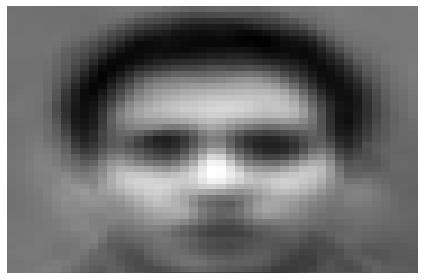

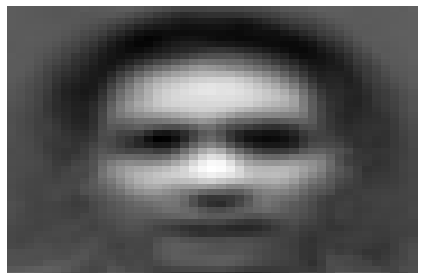

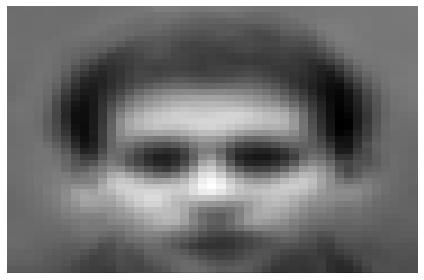

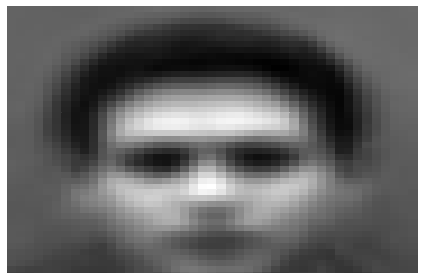

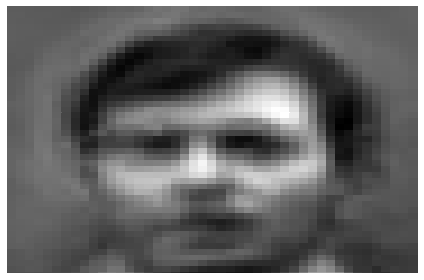

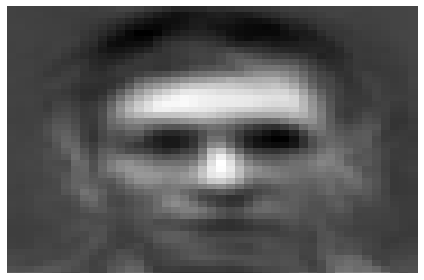

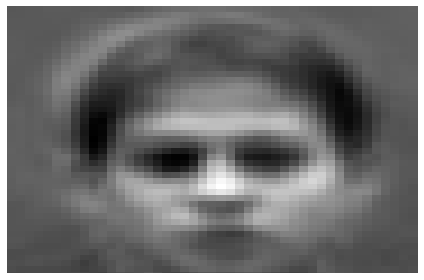

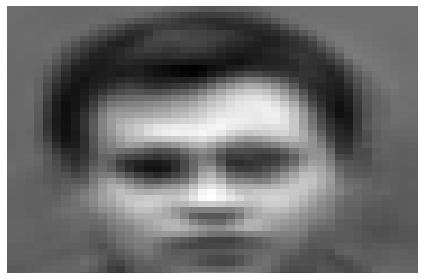

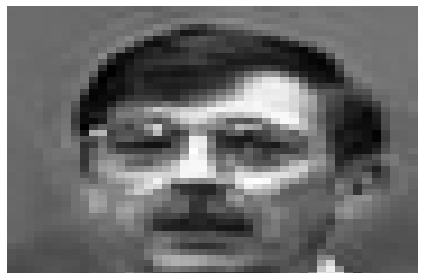

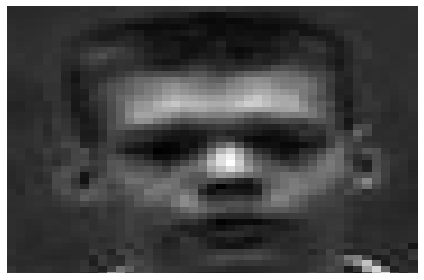

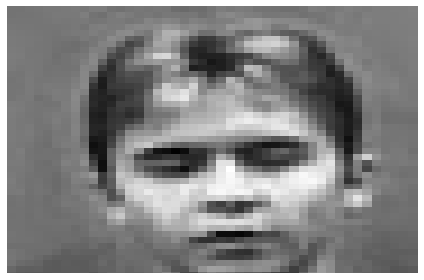

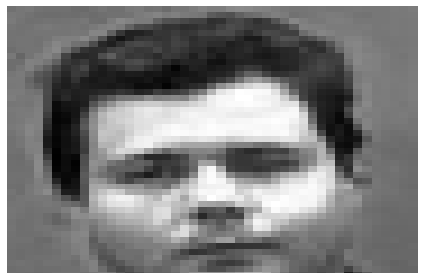

In [5]:
########## YOUR SOLUTION HERE ##########
print('We start with 50 % variance explanation, then go on with 75 %, finally will use 99%:\n\n')
for pca in [pca50,pca75,pca99]:
    Y = pca.fit_transform(data)
    X_back = decompresser(Y, pca)
    for e in range(0,4):
        plotImg(X_back[e, :])
# Part solution:
"""
def plotCompare(....):
    ax = plt.subplot(144) # 1 line 4 columns in total, position 4 of single picture
    # in general: plt.subplot(10,10,c) makes 10 rows and 10 columns, c is position of pic e. g. 80
    ax.pcolor(var50.reshape(45,50).T, cmap=cm.gray)
    ax.set_ylim([45,0])
    ax.axis('off')
    
    fig.tight_layout()
# execute function for certain number of pics:
for i in range(15):
    plotCompare(data[i,:],inversed_99[i,:], inversed_75[i,:],inversed_50[i,:])
"""
        

<h3 style="color:rgb(0,120,170)">Task:</h3>

* Comment on your observations. What type of information is preserved using the 3 different compression rates, what is lost?

<h3 style="color:rgb(210,90,80)">Question (5 points):</h3>

########## YOUR SOLUTION HERE ##########<br><br>
50 % explained variance: <br>
Preserved:<br> 
shapes of the faces <br> Faces are still recognizable.<br>  The fine shadow of under cheeks. 
<br>Losses:<br>
edges: e. g. withdrawal of haircut from the background problematic.<br>  nuances of shadow: e. g. only black eye sockets. <br> pixel values: small pixels cluster together to "one bigger pixel" belonging to their values <br> paler tint<br><br>
75 % explained variance: <br>
Preserved:<br>
haircuts better recognizable (but not perfect) and well separable from the background.
<br>Losses:<br>
nuances of shadow: e. g. only black eye sockets. <br> paler tint<br><br>
99 % explained variance: <br>
Preserved:<br>
dark colors remain. <br> no difference to not compressed pictures recognizable.


Sol:


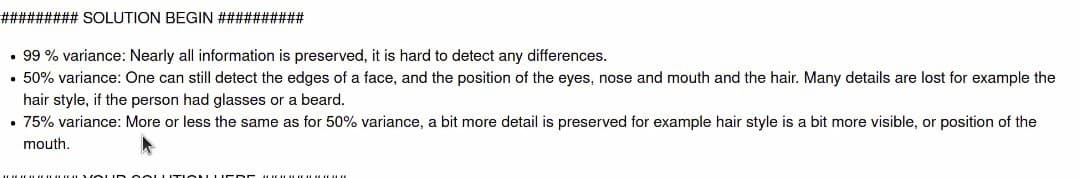

In [2]:
print('Sol:')
Image("pic2_as3.jpg")

<h2 style="color:rgb(0,120,170)">Task 3: PCA vs. Kernel PCA</h2>

Consider the two-dimensional data sets pca3.csv and pca4.csv
(the latter data set has as a third column as label, which should be used for coloring
the plots). First let us read the data, and for pca4 we additionally separate label from date:

In [6]:
#Read data. Nothing to do here!
data3 = np.genfromtxt('pca3.csv', delimiter = ',', skip_header = 0) 
data4 = np.genfromtxt('pca4.csv', delimiter = ',', skip_header = 0)

<h3 style="color:rgb(0,120,170)">Task:</h3>

* Perform PCA for data3 and data4, visualize the principal components together with the data and
determine the proportion of variance for each of the components.

<h3 style="color:rgb(208,90,80)">Code (10 Points):</h3>

Alter sol:


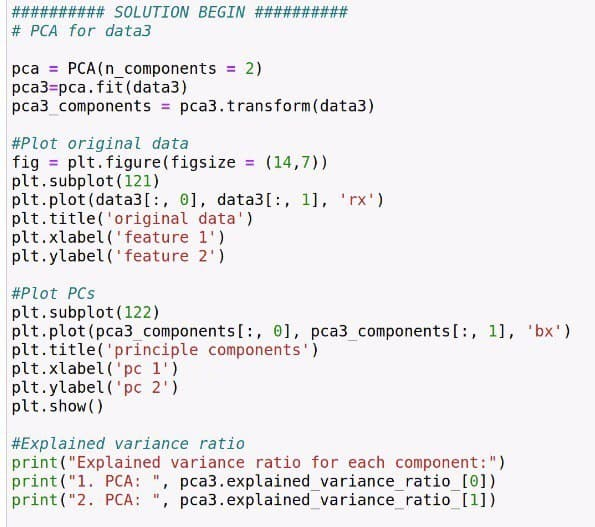

In [5]:
print('Alter sol:')
Image("pic3_as3.jpg")


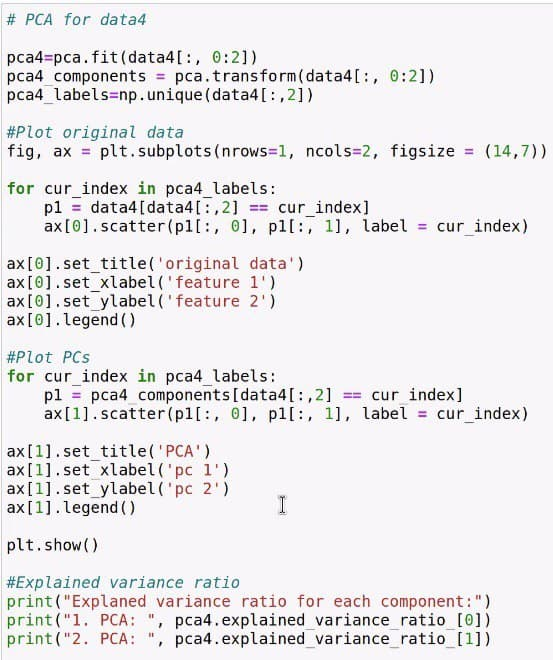

In [6]:
Image('pic4_as3.jpg')

In [7]:
########## YOUR SOLUTION HERE ##########
pca_data3 = PCA(n_components = data3.shape[1])
pca_data3.fit(data3)

U_t = pca_data3.components_ # row is eigenvector # U.T


vector1 = U_t[0]
vector2 =  U_t[1]

mean_data31 = data3[:,0].mean()
mean_data32 = data3[:,1].mean()


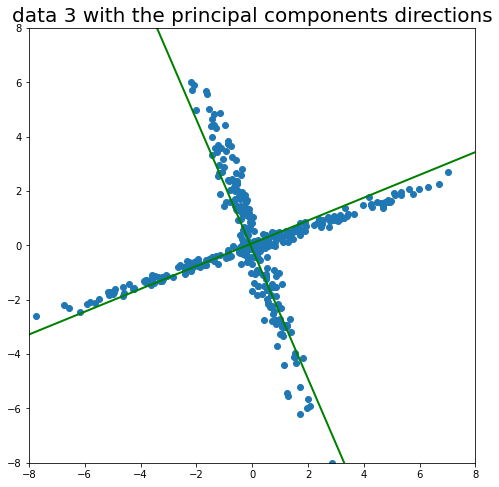

Proportion of explained variance of each of the Principal Components: [0.593217 0.406783]


In [8]:
import math
plt.figure(figsize=(8,8)) 

ax = plt.axes()

ax.axline((mean_data31+vector1[0],mean_data32+vector1[1]), (mean_data31-vector1[0],mean_data32-vector1[1]),  slope=None, c='green',lw=2)
ax.axline((mean_data31+vector2[0],mean_data32+vector2[1]), (mean_data31-vector2[0],mean_data32-vector2[1]),  slope=None, c='green',lw=2)

plt.xlim(-8,8)
plt.ylim(-8,8)

plt.scatter(data3[:,0],data3[:,1])

plt.title('data 3 with the principal components directions',fontsize=20)
plt.show()


print(f'Proportion of explained variance of each of the Principal Components: {pca_data3.explained_variance_ratio_ }')


/home/c/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:18: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.


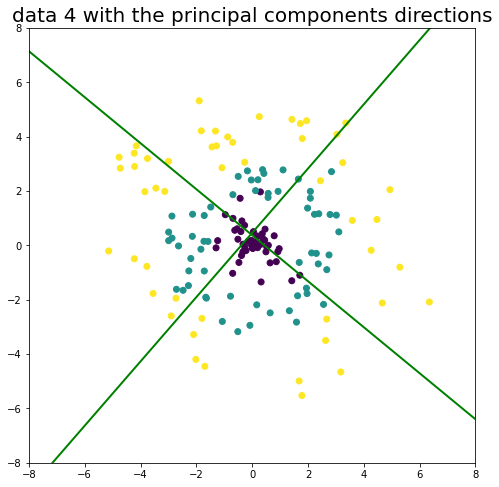

Proportion of explained variance of each of the Principal Components: [0.54469358 0.45530642]


In [9]:
data4_x = data4[:,0:2]
mean_data41 = data4[:,0].mean()
mean_data42 = data4[:,1].mean()

pca_data4 = PCA(n_components = data4_x.shape[1]) 
pca_data4.fit(data4_x)


U_t = pca_data4.components_ # row is eigenvector # U.T
vector1 = U_t[0]
vector2 =  U_t[1]

plt.figure(figsize=(8,8)) 

plt.xlim(-8,8)
plt.ylim(-8,8)

ax = plt.axes()

ax.axline((mean_data41+vector1[0],mean_data42+vector1[1]), (mean_data41-vector1[0],mean_data42-vector1[1]),  slope=None, c='green',lw=2)
ax.axline((mean_data41+vector2[0],mean_data42+vector2[1]), (mean_data41-vector2[0],mean_data42-vector2[1]),  slope=None, c='green',lw=2)

plt.scatter(data4[:,0],data4[:,1],c=data4[:,2])

plt.title('data 4 with the principal components directions',fontsize=20)
plt.show()


print(f'Proportion of explained variance of each of the Principal Components: {pca_data4.explained_variance_ratio_ }')


<h3 style="color:rgb(0,120,170)">Task:</h3>

* Perform Kernel PCA on both datasets. Try polynomial and RBF-kernels. For polynomial kernel use at least the parameters $\gamma=2$ and degree $3$, for RBF $\gamma=0.25$. You are of course allowed (and encourgaged) to try more different parameters and also different kernels to get a better feeling.

* Also visualize the projected data together with the original ones. 

* Finally, visualize the projection onto the first principal component in the RBF-kernel plots for data4 (can also be done together in one plot). This should also convince you about the fact that the first PC already contains a huge part of the information of the data, e.g. the data can already be well separated by the first PC. 

<h3 style="color:rgb(208,90,80)">Code (20 Points):</h3>

Alter sol:


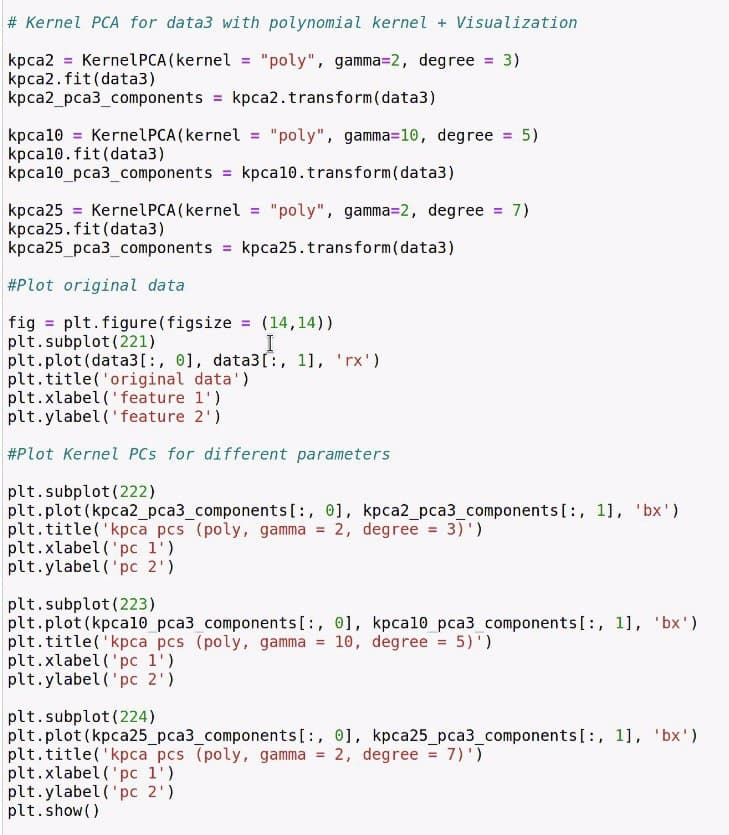

In [7]:
print('Alter sol:')
Image('pic5_as3.jpg')

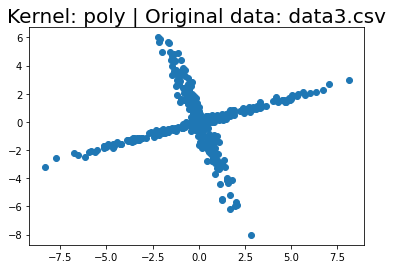

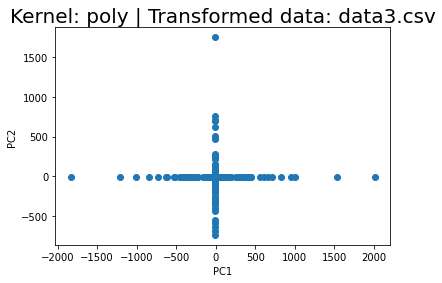

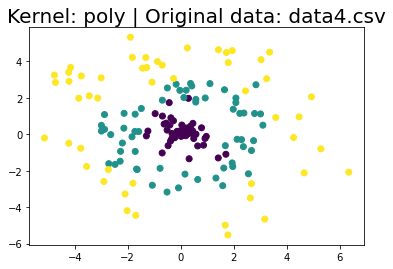

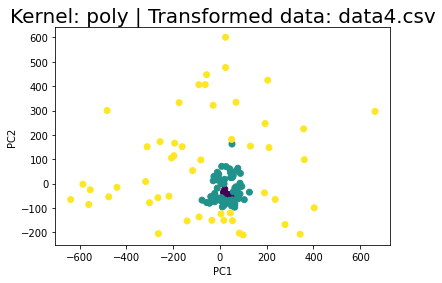

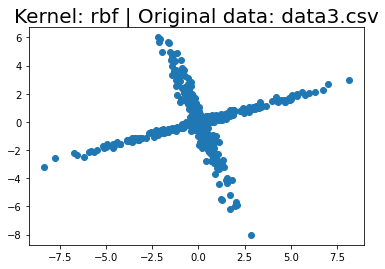

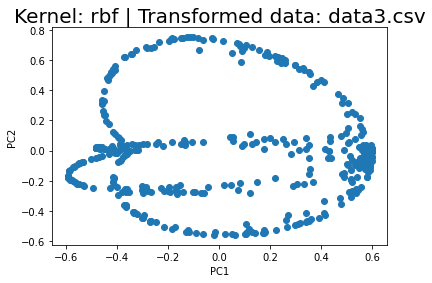

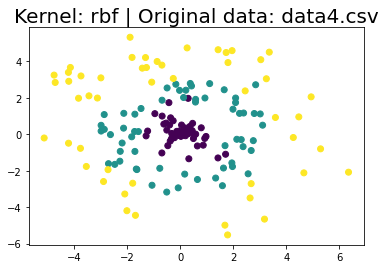

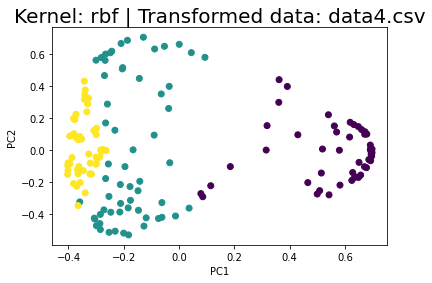

In [10]:
for kernel, gamma in zip(['poly', 'rbf'], [2, 0.25]):
    kpca = KernelPCA(n_components=None, kernel=kernel, gamma=gamma, degree=3)

    for name, file in zip(['data3.csv', 'data4.csv'],[data3,data4]):
        try:
            co = file.T[2]
        except:
            co = None
            
        plt.scatter(file.T[0],file.T[1], c=co)
        plt.title(f'Kernel: {kernel} | Original data: {name}',fontsize=20)
        plt.show()
        Y_poly = kpca.fit_transform(file)
        plt.scatter(Y_poly.T[0], Y_poly.T[1],c=co)
        plt.title(f'Kernel: {kernel} | Transformed data: {name}',fontsize=20)
        plt.xlabel('PC1')
        plt.ylabel('PC2')
        plt.show()
        

(-0.1, 0.1)

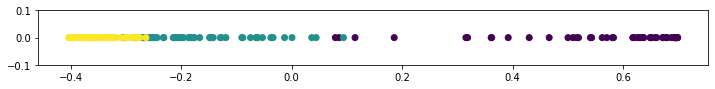

In [13]:
kpca_rbf = KernelPCA(n_components=1, kernel='rbf', gamma=0.25)
plt.figure(figsize=(12,1))
Y_rbf = kpca_rbf.fit_transform(data4)
one = np.zeros((Y_rbf.shape[0],1))
plt.scatter(Y_rbf,one, c=data4.T[2])
plt.ylim(-0.1,0.1)


In [12]:
kpca = KernelPCA(n_components=None, kernel='rbf', gamma=0.25, degree=3)
Y_poly = kpca.fit_transform(data3)
Y_poly.shape


(400, 157)

<h3 style="color:rgb(0,120,170)">Task:</h3>

Can you observe advantages/disadvantages of Kernel PCA compared to PCA without
using a kernel? For which kind of data do you observe them?


<h3 style="color:rgb(208,90,80)">Question (10 Points):</h3>

########## YOUR SOLUTION HERE ##########

Advantage: The rbf kernel allows us to separate the classes of data4.csv very well with the first principal component. The PCA isn't able to achieve that because the classes aren't linearly separable.<br>
Disadvantage: data of data3.csv can be very well described with the PCA whereas the kernel PCA isn't able to separate the two almost orthogonal distributions well.

sol:


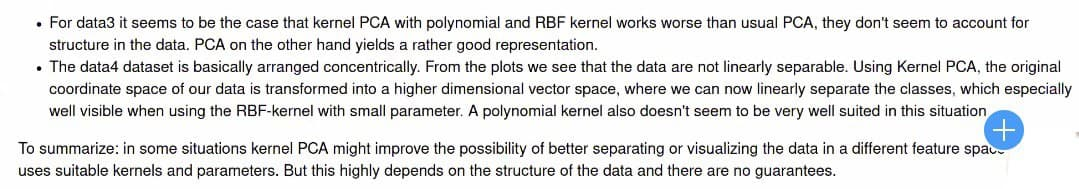

In [8]:
print('sol:')
Image('pic6_as3.jpg')